# Exercise 1: Structuring a given code

### Original

In [453]:
# file_path = input("Enter the path to the CSV file: ")
# records = []
# with open(file_path, 'r') as file:
#     csv_reader = csv.DictReader(file)
#     for row in csv_reader:
#         records.append(row)

# total = sum(float(record['Grade']) for record in records)
# average = total / len(records)

# print(f"Average Grade: {average}")
# print("--------------------")

# filtered_records = [record for record in records if float(record['Grade']) >= 80.0]

# print("Student Report")
# print("--------------")
# for record in filtered_records:
#     print(f"Name: {record['Name']}")
#     print(f"Grade: {record['Grade']}")
#     print("--------------------")

### Structured

##### Functions

In [454]:
def get_records(path_to_csv: str) -> list[dict[str, str]]:
    """Returns a list of records based on a given path to a CSV.
    
    Arguments:
        path_to_csv (str): The path (relative to the CWD) to a CSV file containting the records.
    Returns:
        list: The records read from the afformentioned file.
    """
    
    records = []
    
    # Read each line of the CSV
    with open(file_path, 'r') as file:
        csv_reader = csv.DictReader(file)
        for row in csv_reader:
            records.append(row)
            
    # Return records
    return records

In [455]:
def get_average_grade(records: list[str]) -> float:
    """Return the average grade for a given list of student records.

    Args:
        records (list): The list of student records.

    Returns:
        float: The average grade.
    """
    
    # Convert grade to float for each records and calculate the average.
    return sum(float(record['Grade']) for record in records) / len(records)

In [456]:
def print_underlined(string: str) -> None:
    """Prints a string followed by dashed on the next line.

    Args:
        string (str): The String to print underlined.
    """
    
    # Determine max line length
    lines = string.split('\n')
    max_line_len = max([len(line) for line in lines])

    # Print with underline
    print(string)
    print("-" * max_line_len)

##### Main

In [457]:
def print_student_reports():
    """Prompts the user to enter a path to a CSV file containing student reports before printing said reports.
    """
    
    
    # Get records based on a user-entered path to a CSV file.
    records = get_records(input("Enter the path to the CSV file: "))

    # Calculate and print the average grade.
    print_underlined(get_average_grade(records))

    # Print student reports where the grade is 8 or higher
    min_grade = 8
    print_underlined("-- Student Reports --")
    for record in records:
        grade = record['Grade']
        if float(grade) >= min_grade:
            print_underlined(f"Name: {record['Name']}\nGrade: {record['Grade']}")

# Exercise 2: Mandelbrot visualisation

### Functions

In [458]:
import cmath                          # Complex number operations.
import matplotlib.pyplot as plt       # Plotting
from matplotlib import colormaps      # Colors
import matplotlib.patches as mpatches # More colors
import numpy as np                    # Array utilities
import random as rng                  # RNG
import time                           # Timing
import threading                      # Multithreading

In [459]:
def enumerate2d(np_array):
    for y, row in enumerate(np_array):
        for x, element in enumerate(row):
            yield (x, y, element)

In [460]:
def get_random_colormap(subtypes: list[str] = None):
    """Returns a random colormap key from matplotlib.colormaps. Optionally filter for colormap types

    Args:
        subtypes (list[str], optional): _description_. Defaults to None. See: https://matplotlib.org/stable/users/explain/colors/colormaps.html

    Returns:
        str: A random colormap key
    """
    
    
    # Source: https://matplotlib.org/stable/users/explain/colors/colormaps.html
    # Diverging and cyclic maps probably won't work well
    cmap_types = {
        'Perceptually Uniform Sequential': [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis'
        ],
        'Sequential' : [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'
        ],
        'Sequential (2)': [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone',
            'pink', 'spring', 'summer', 'autumn', 'winter', 'cool',
            'Wistia', 'hot', 'afmhot', 'gist_heat', 'copper'
        ],
        'Diverging': [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlBu',
            'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic'
        ],
        'Cyclic': [
            'twilight', 'twilight_shifted', 'hsv'
        ],
        'Qualitative': [
            'Pastel1', 'Pastel2', 'Paired', 'Accent', 'Dark2',
            'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b',
            'tab20c'
        ],
        'Miscellaneous': [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain',
            'gist_stern', 'gnuplot', 'gnuplot2', 'CMRmap',
            'cubehelix', 'brg', 'gist_rainbow', 'rainbow', 'jet',
            'turbo', 'nipy_spectral', 'gist_ncar'
        ]
    }
    
    # Return random colormap from selected subtypes (or all if subtypes is None)
    # Syntax is a bit weird. Got it from here:
    # https://stackoverflow.com/questions/952914/how-do-i-make-a-flat-list-out-of-a-list-of-lists
    return rng.choice(
        [
            map for key, cmaps 
            in cmap_types.items() 
            if (
                (subtypes is None) or 
                (key in subtypes)
            )
            for map in cmaps
        ]
    )
    
get_random_colormap()

'viridis'

In [461]:
def get_diverging_index(c: complex, threshhold: float, limit: int) -> int:
    """Returns the mandelbrot diverging-index for c

    Arguments:
        c (complex): A complex number.
        threshhold (float): The threshhold the series must reach to be considered divergent.
        limit (int): The maximum amount of iterations to run.
        
    Returns:
        The diverging-index for c (the iteration at which the threshhold is reached OR the limit if the threshhold is never reached). 
    """

    # Initialize series start and diverging-index.
    a = 0
    i = 0
    
    # Iterate series untill threshhold surpassed OR iteration limit reached.
    while abs(a) <= threshhold and i < limit:
        a = a**2 + c
        i += 1
        
    # Return diverging-index.
    return i

In [462]:
def set_diverging_index(arr, x, y, c, divergence_threshhold, diverging_index_limit):
    # Set diverging index for c
    arr[x, y] = get_diverging_index(c, divergence_threshhold, diverging_index_limit)
    # print(f"Finished ({x},{y})")

In [467]:
def set_diverging_index_row(arr, x, c_map, divergence_threshhold, diverging_index_limit, thread_times):
    
    t0 = time.time()
    for y, c in enumerate(c_map[x, :]):
        
        # Set diverging index for c
        arr[x, y] = get_diverging_index(c, divergence_threshhold, diverging_index_limit)
        
        # Record execution time
        thread_times[x] = time.time() - t0
        
    # print(f"Finished ({x},{y})")

In [570]:
def draw_mandel(
    resolution: tuple[int, int], 
    range_x: tuple[float, float], 
    range_y: tuple[float, float], 
    divergence_threshhold: float, 
    diverging_index_limit: int, 
    figsize: tuple[int, int] = (20,10),
    xtick_stepsize: float = 0.2,
    ytick_stepsize: float = 0.2,
    colormap_key: str = 'random',
    multithread: bool = False,
    show_info: bool = False
) -> None:
    """Draws the mandelbrot set

    Args:
        resolution tuple[int, int]: The width and height (respectively) of the image produced.
    """

    
    # Measure starting time
    t0 = time.time()
    
    # Create 2D pixel array (scalars) (uint8 is the smallest int type we can use, going up to 255)
    pixels = np.ndarray(resolution, np.uint8)
    
    # Determine points on complex-plane
    pixels_c = np.array([
        [
            complex(
                px / resolution[0] * (range_x[1] - range_x[0]) + range_x[0], 
                py / resolution[1] * (range_y[1] - range_y[0]) + range_y[0]
            ) for px, _ in enumerate(row)
        ] for py, row in enumerate(pixels)
    ])
    
    if multithread:
        
        # Iterate over each pixel
        # threads = [threading.Thread(target=set_diverging_index, args=(pixels, ix, iy, pixels_c[ix, iy], divergence_threshhold, diverging_index_limit)) for iy, ix in np.ndindex(pixels.shape)]
        thread_times = np.repeat(time.time(), pixels.shape[1])
        
        # Make thread for each pixel row
        threads = [threading.Thread(target=set_diverging_index_row, args=(pixels, ix, pixels_c, divergence_threshhold, diverging_index_limit, thread_times)) for ix in range(pixels.shape[1])]
        
        for thread in threads:
            thread.start()
        for thread in threads:
            thread.join()
    else:
        for iy, ix in np.ndindex(pixels.shape):
            
            # # Get diverging index for c
            # pixels[ix, iy] = get_diverging_index(pixels_c[ix, iy], divergence_threshhold, diverging_index_limit)
            
            set_diverging_index(pixels, ix, iy, pixels_c[ix, iy], divergence_threshhold, diverging_index_limit)
    
    # Initialize figure
    plt.figure(figsize = figsize)
    
    # Show image with colormap
    cmap = get_random_colormap() if colormap_key == 'random' else colormap_key
    plt.imshow(pixels, origin='lower', cmap = cmap) # Second argument flips y
    
    if show_info:
        # Set custom legend for parameters
        cellTexts = [
            ['Resolution:', resolution],
            ['Threshold:', divergence_threshhold],
            ['Iterations:', diverging_index_limit],
            ['Colormap:', cmap],
            ['Time [s]:', f"{time.time() - t0:.2f}"]
        ]
        
        # Append info about threads if multithreading
        if multithread:
            cellTexts += [
                ['Threads:', len(threads)],
                ['Thread-time [s]:', f"{np.array(thread_times).sum():.2f}"]
            ]
            
        # Set cell colors
        cellColours=np.zeros(shape=(len(cellTexts),2,4))
        cellColours[:,:,0:3] = 1  # Color
        cellColours[:,:,3] = 0.75 # Opacity
        
        # Add info table 
        plt.table(
            cellTexts,
            # fontsize = 200, # Doesn't work?
            # cellColours=cellColours, 
            bbox =  [0, 0.85, 0.2, 0.15],
            colWidths=[0.6, 0.4]
        ).set_fontsize(20)
    
    # Set colorbar (on the right)
    cbar = plt.colorbar(ticks=np.linspace(0, diverging_index_limit, 6))
    cbar.ax.set_yticklabels(['0','20','40', '60', '80', '>=100'])
    cbar.set_label('Diverging index', rotation=270)
    
    # Set x ticks
    x_tick_count = (int)((range_x[1] - range_x[0]) // xtick_stepsize + 1)  # floor division (//) returned a float for some reason
    plt.xticks(np.linspace(0, resolution[0], x_tick_count + 1), np.linspace(range_x[0], range_x[1], x_tick_count + 1).round(1))
    
    # Set y ticks
    y_tick_count = (int)((range_y[1] - range_y[0]) // ytick_stepsize + 1)  # floor division (//) returned a float for some reason
    plt.yticks(np.linspace(0, resolution[1], y_tick_count + 1), np.linspace(range_y[0], range_y[1], y_tick_count + 1).round(1))
    
    # Show plot
    plt.show()

### Main

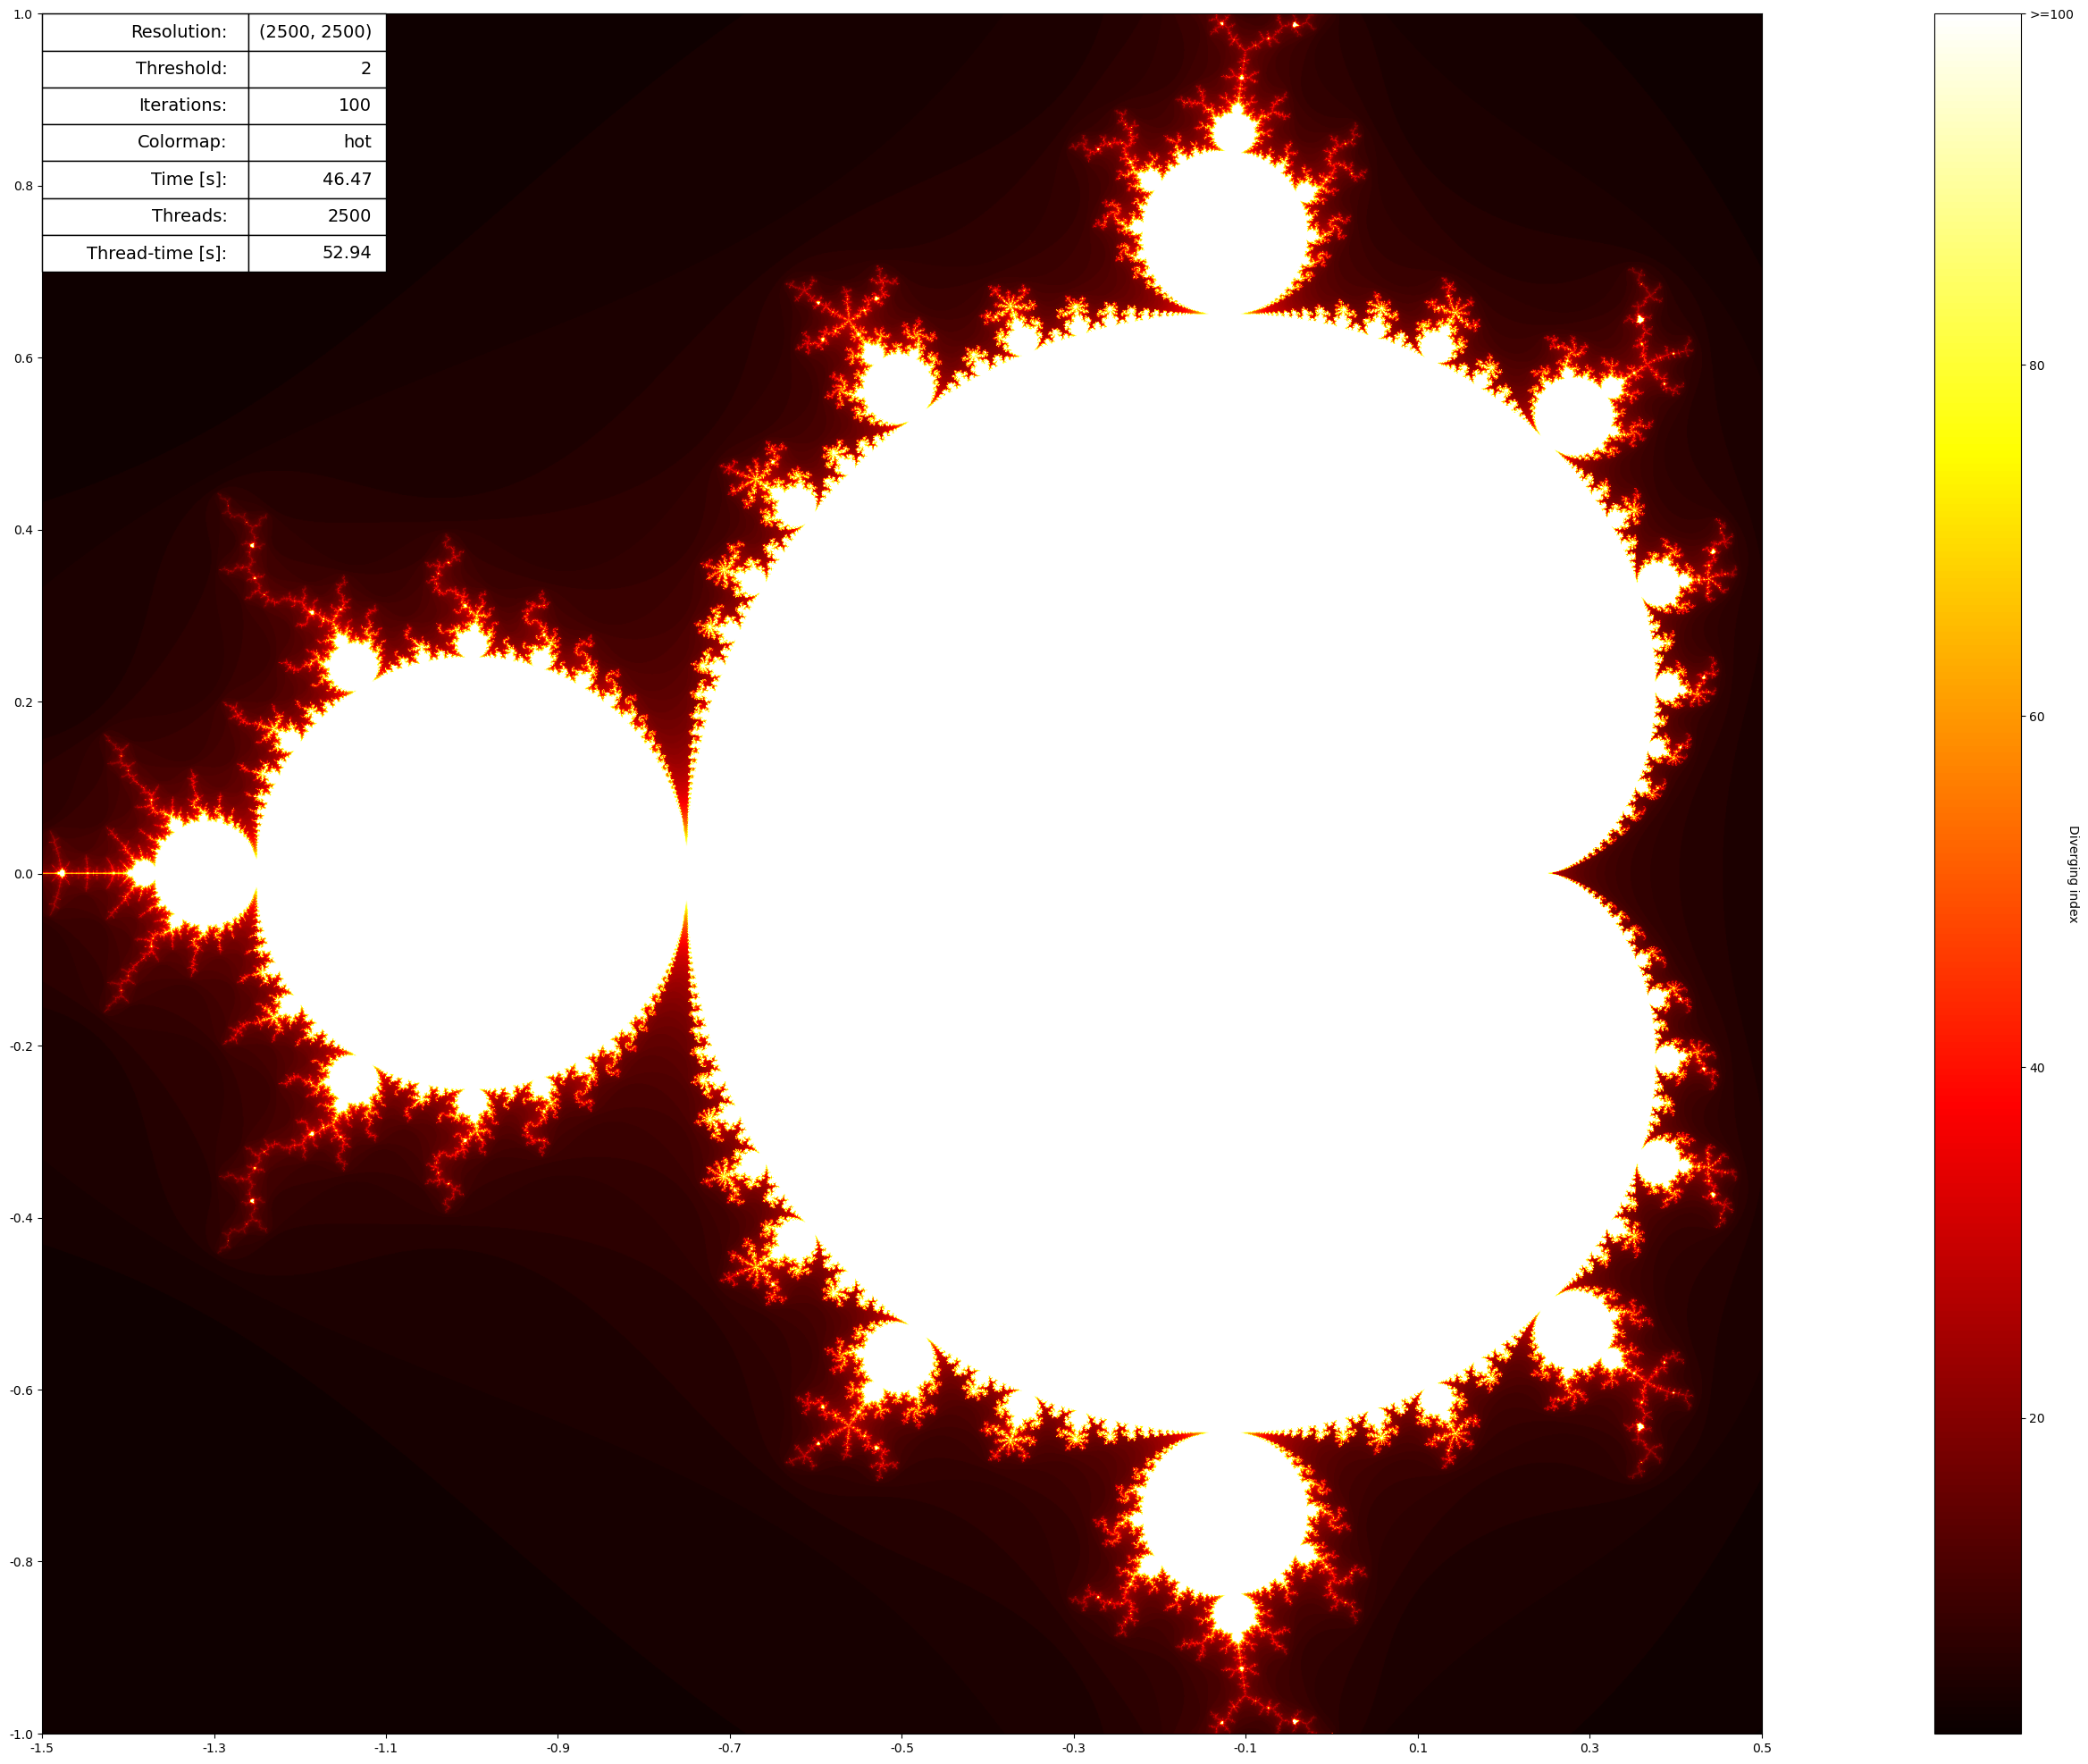

In [572]:
# Settings
resolution =            (2500, 2500)
range_x =               (-1.5, 0.5)
range_y =               (-1, 1)
divergence_threshhold = 2
diverging_index_limit = 100
colormap_key =          'hot'
multithread =           True
show_info =             True

# Draw mandelbrot
draw_mandel(
    resolution, 
    range_x, 
    range_y, 
    divergence_threshhold, 
    diverging_index_limit, 
    figsize=(50,25), 
    colormap_key = colormap_key, 
    multithread = multithread, 
    show_info = show_info
)

# Exercise 3: Google PageRank algorithm and the worldwide web

In [466]:
import networkx as nx 
print('hello')

hello
